In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
data = pd.read_csv("transformed_data.csv")
data2 = pd.read_csv("raw_data.csv")
data

In [132]:
data.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


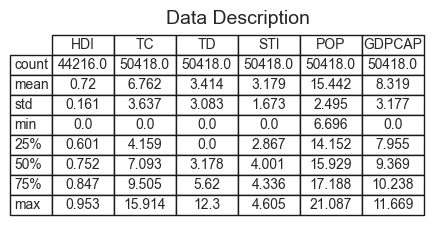

In [133]:
data_desc = data.iloc[:,3:].describe().round(3)
fig, ax = plt.subplots(figsize=(4, 2))
ax.axis('off')

table = ax.table(cellText=data_desc.values,
                 colLabels=data_desc.columns,
                 rowLabels=data_desc.index,
                 cellLoc='center',
                 loc='upper center')


table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Data Description',fontsize=14)
plt.savefig('data description.png',bbox_inches='tight',facecolor='white')
plt.show()

In [22]:
data["COUNTRY"].value_counts()

COUNTRY
Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: count, Length: 210, dtype: int64

In [23]:
data["COUNTRY"].value_counts().mode()

0    294
Name: count, dtype: int64

In [135]:
# Aggregating the data

code = data["CODE"].unique().tolist()
country = data["COUNTRY"].unique().tolist()
hdi = []
tc = []
td = []
sti = []
population = data["POP"].unique().tolist()
gdp = []

for i in country:
    hdi.append((data.loc[data["COUNTRY"] == i, "HDI"]).sum()/294)
    tc.append((data2.loc[data2["location"] == i, "total_cases"]).sum())
    td.append((data2.loc[data2["location"] == i, "total_deaths"]).sum())
    sti.append((data.loc[data["COUNTRY"] == i, "STI"]).sum()/294)
    population.append((data2.loc[data2["location"] == i, "population"]).sum()/294)

aggregated_data = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)), 
                               columns = ["Country Code", "Country", "HDI", 
                                          "Total Cases", "Total Deaths", 
                                          "Stringency Index", "Population"])
aggregated_data.head()

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
0,AFG,Afghanistan,0.498000,5126433.0,165875.0,3.049673,17.477233
1,ALB,Albania,0.600765,1071951.0,31056.0,3.005624,14.872537
2,DZA,Algeria,0.754000,4893999.0,206429.0,3.195168,17.596309
3,AND,Andorra,0.659551,223576.0,9850.0,2.677654,11.254996
4,AGO,Angola,0.418952,304005.0,11820.0,2.965560,17.307957


In [136]:
# Sorting Data According to Total Cases

data = aggregated_data.sort_values(by=["Total Cases"], ascending=False)
data.head()

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
200,USA,United States,0.92400,746014098.0,26477574.0,3.350949,19.617637
27,BRA,Brazil,0.75900,425704517.0,14340567.0,3.136028,19.174732
90,IND,India,0.64000,407771615.0,7247327.0,3.610552,21.045353
157,RUS,Russia,0.81600,132888951.0,2131571.0,3.380088,18.798668
150,PER,Peru,0.59949,74882695.0,3020038.0,3.430126,17.311165


In [137]:
# Top 10 Countries with Highest Covid Cases

data = data.head(10)
data

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
200,USA,United States,0.924000,746014098.0,26477574.0,3.350949,19.617637
27,BRA,Brazil,0.759000,425704517.0,14340567.0,3.136028,19.174732
90,IND,India,0.640000,407771615.0,7247327.0,3.610552,21.045353
157,RUS,Russia,0.816000,132888951.0,2131571.0,3.380088,18.798668
150,PER,Peru,0.599490,74882695.0,3020038.0,3.430126,17.311165
125,MEX,Mexico,0.774000,74347548.0,7295850.0,3.019289,18.674802
178,ESP,Spain,0.887969,73717676.0,5510624.0,3.393922,17.660427
175,ZAF,South Africa,0.608653,63027659.0,1357682.0,3.364333,17.898266
42,COL,Colombia,0.581847,60543682.0,1936134.0,3.357923,17.745037
199,GBR,United Kingdom,0.922000,59475032.0,7249573.0,3.353883,18.033340


In [139]:
#add two more columns (GDP per capita before Covid-19, GDP per capita during Covid-19)
data["GDP Before Covid"] = [65279.53, 8897.49, 2100.75, 
                            11497.65, 7027.61, 9946.03, 
                            29564.74, 6001.40, 6424.98, 42354.41]
data["GDP During Covid"] = [63543.58, 6796.84, 1900.71, 
                            10126.72, 6126.87, 8346.70, 
                            27057.16, 5090.72, 5332.77, 40284.64]
data

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population,GDP Before Covid,GDP During Covid
200,USA,United States,0.924000,746014098.0,26477574.0,3.350949,19.617637,65279.53,63543.58
27,BRA,Brazil,0.759000,425704517.0,14340567.0,3.136028,19.174732,8897.49,6796.84
90,IND,India,0.640000,407771615.0,7247327.0,3.610552,21.045353,2100.75,1900.71
157,RUS,Russia,0.816000,132888951.0,2131571.0,3.380088,18.798668,11497.65,10126.72
150,PER,Peru,0.599490,74882695.0,3020038.0,3.430126,17.311165,7027.61,6126.87
125,MEX,Mexico,0.774000,74347548.0,7295850.0,3.019289,18.674802,9946.03,8346.70
178,ESP,Spain,0.887969,73717676.0,5510624.0,3.393922,17.660427,29564.74,27057.16
175,ZAF,South Africa,0.608653,63027659.0,1357682.0,3.364333,17.898266,6001.40,5090.72
42,COL,Colombia,0.581847,60543682.0,1936134.0,3.357923,17.745037,6424.98,5332.77
199,GBR,United Kingdom,0.922000,59475032.0,7249573.0,3.353883,18.033340,42354.41,40284.64


In [30]:
data.Country.unique()

array(['United States', 'Brazil', 'India', 'Russia', 'Peru', 'Mexico',
       'Spain', 'South Africa', 'Colombia', 'United Kingdom'],
      dtype=object)

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



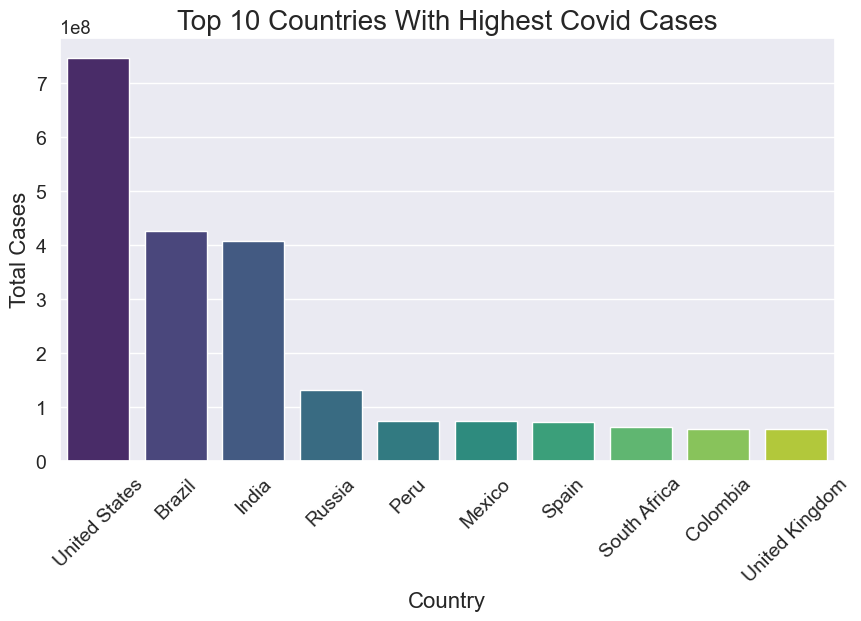

In [140]:
#plotting top countries by cases
plt.figure(figsize=(10, 5.5))
sns.set(font_scale=1.2)
sns.barplot(data=data, y='Total Cases', x='Country', palette='viridis')
plt.title('Top 10 Countries With Highest Covid Cases', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Total Cases',fontsize=16)
plt.savefig('top countries by cases.png',bbox_inches='tight',facecolor='white')
plt.show()

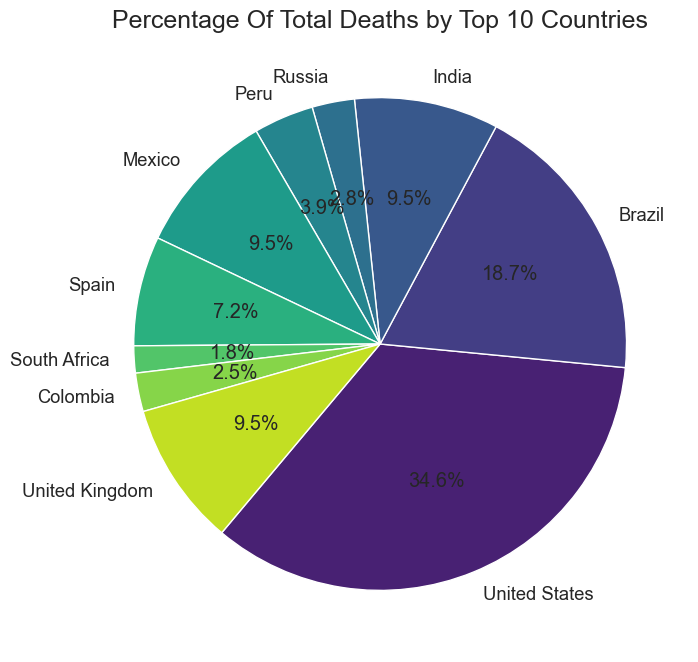

In [141]:
#plot top countries by deaths
plt.figure(figsize=(12, 8))
plt.pie(data['Total Deaths'], labels=data['Country'], startangle=230, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(data)))
plt.title('Percentage Of Total Deaths by Top 10 Countries', fontsize=18)
plt.savefig('pie deaths.png',bbox_inches='tight',facecolor='white')
plt.show()

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



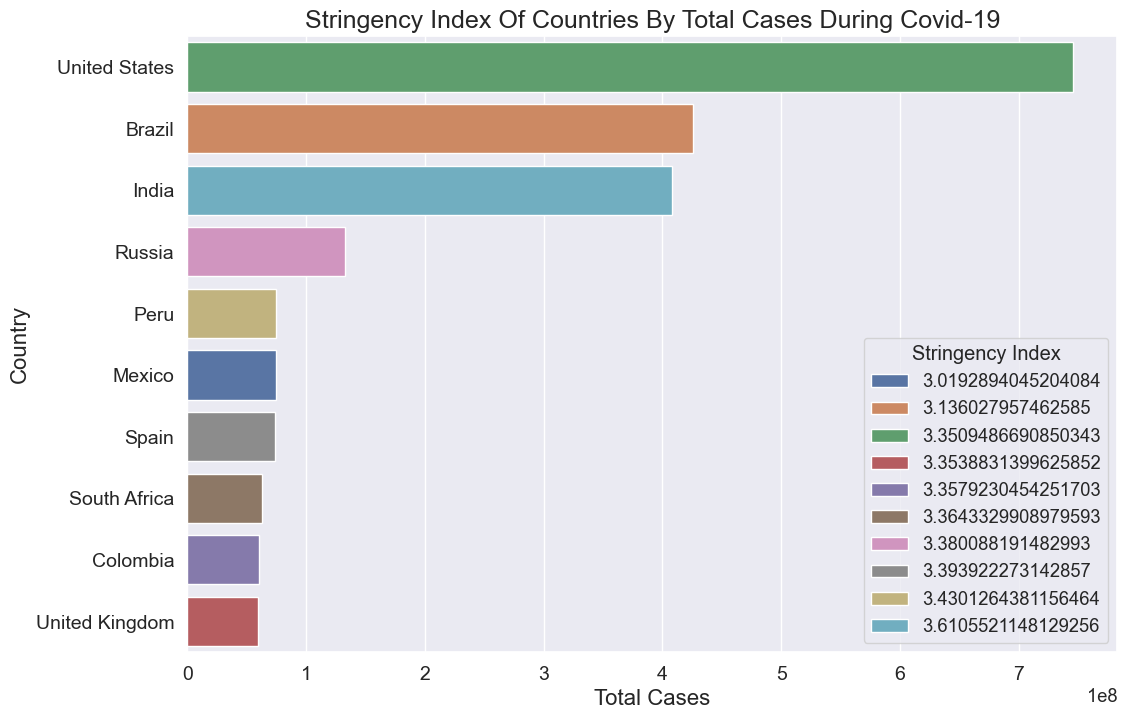

In [142]:
##plot stringency index of countries by cases
plt.figure(figsize=(12, 8))
sns.barplot(data=data, y='Country', x='Total Cases', hue='Stringency Index', dodge=False)
plt.xlabel('Total Cases', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Stringency Index Of Countries By Total Cases During Covid-19', fontsize=18)
plt.legend(title='Stringency Index')
plt.savefig('stringency index.png',bbox_inches='tight',facecolor='white')
plt.show()

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

E:\Softwares\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



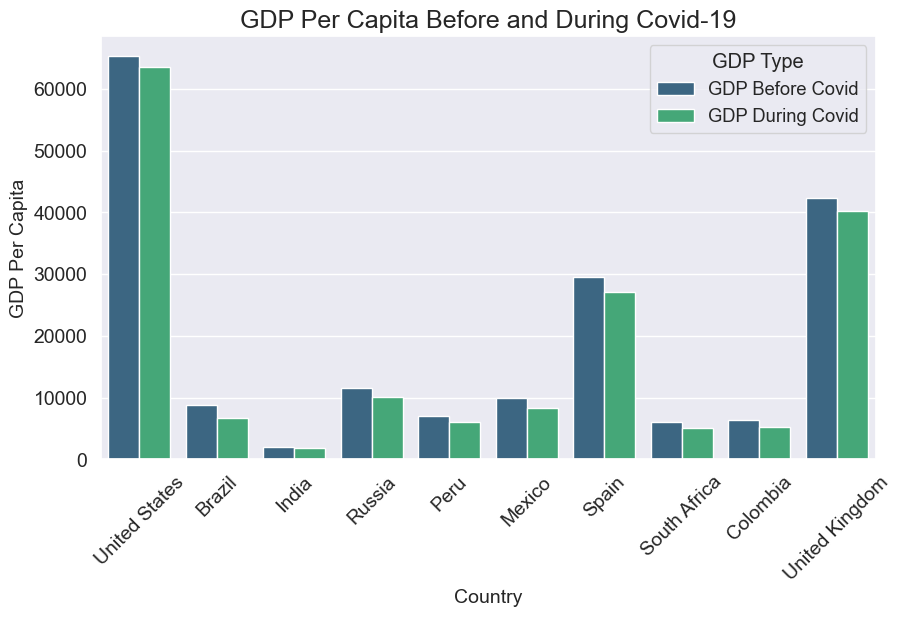

In [143]:
##plot and compare gdp of countries before and during covid
melted_data = data.melt(id_vars=['Country'], value_vars=['GDP Before Covid', 'GDP During Covid'], 
                         var_name='GDP Type', value_name='GDP')

plt.figure(figsize=(10, 5.5))
sns.barplot(data=melted_data, x='Country', y='GDP', hue='GDP Type', palette='viridis')
plt.xlabel('Country', fontsize=14)
plt.ylabel('GDP Per Capita', fontsize=14)
plt.title('GDP Per Capita Before and During Covid-19', fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='GDP Type')
plt.savefig('gdp before and after.png',bbox_inches='tight',facecolor='white')
plt.show()

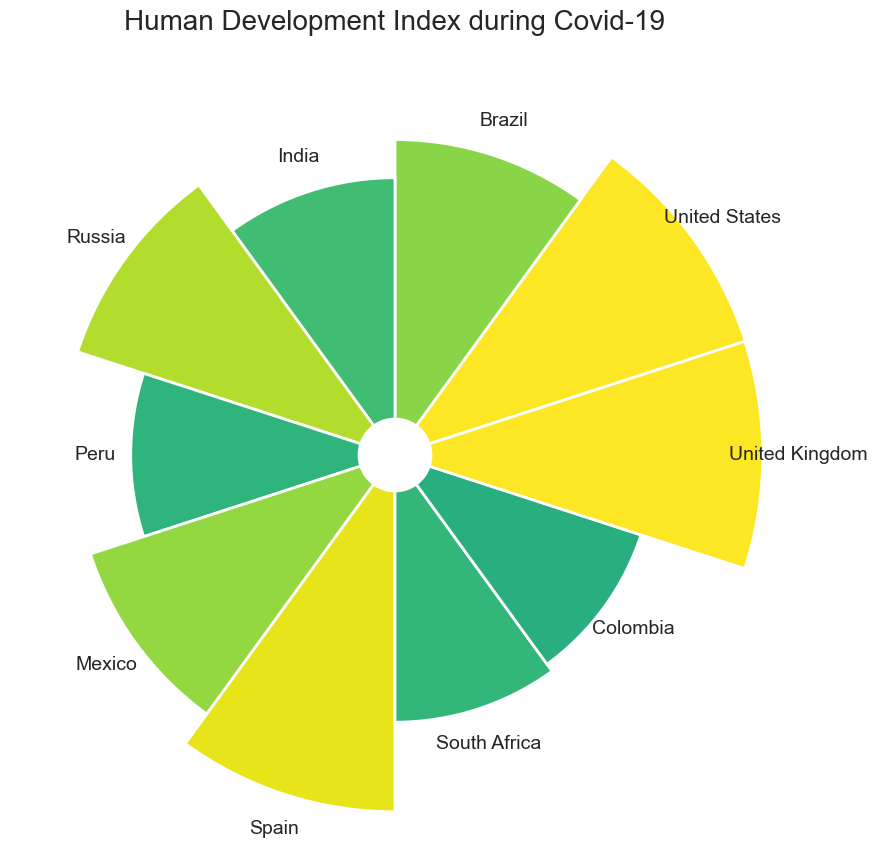

In [146]:
##plot HDI Of each country by total cases
plt.figure(figsize=(20,10))

ax = plt.subplot(111, polar=True)

plt.axis('off')

upperLimit = 1.4
lowerLimit = 0.1

max = data['HDI'].max()
max_val = data['HDI'].max()

slope = (max - lowerLimit) / max
heights = slope * data.HDI + lowerLimit


width = 2*np.pi / len(data.index)

indexes = list(range(1, len(data.index)+1))
angles = [element * width for element in indexes]
angles


bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
color=plt.cm.viridis(data['HDI'] / max_val))


for angle, country, height in zip(angles, data['Country'], heights):
    ax.text(angle, height + 0.2, country, ha='center', va='center', fontsize=14)
    
plt.title('Human Development Index during Covid-19', fontsize=20)
plt.savefig('HDI during covid.png',bbox_inches='tight',facecolor='white')